Insight Project 
####Using gut microbe data to predict the risk of colorectal cancer####
### Model selection

In [4]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
#import imblearn
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [5]:
train_gut = pd.read_csv('train_valid.csv')

In [6]:
train_gut.head()

,Sample ID,Group,Age,Gender,BMI,FOBT,TNM Stage,AJCC Stage,Localization,SP1,...,SP18,SP19,SP20,SP21,SP22,SP23,SP24,SP25,SP26,SP27
0,CCIS13047523ST-4-0,0,70,M,22,Negative,NaN,NaN,NaN,0.0,...,0.006372,0.000030,0.029929,0.020163,0.026813,0.000024,0.010368,0.004470,0.000048,0.005749
1,CCIS15794887ST-4-0,0,37,F,18,Negative,NaN,NaN,NaN,0.0,...,0.000027,0.000012,0.001646,0.004186,0.003220,0.000115,0.015902,0.000138,0.007050,0.039191
2,CCIS16326685ST-4-0,0,46,F,29,Negative,NaN,NaN,NaN,0.0,...,0.000221,0.000007,0.000065,0.025932,0.006403,0.000013,0.002478,0.004445,0.005865,0.000616
3,CCIS16383318ST-4-0,0,61,F,24,Negative,NaN,NaN,NaN,0.0,...,0.001332,0.000000,0.008234,0.001056,0.001486,0.000006,0.000030,0.004695,0.001168,0.001902
4,CCIS16561622ST-4-0,0,54,M,26,Negative,NaN,NaN,NaN,0.0,...,0.020315,0.000006,0.003930,0.000182,0.032794,0.000000,0.009390,0.002922,0.000025,0.006026


In [7]:
train_gut.describe()

,Group,Age,BMI,SP1,SP2,SP3,SP4,SP5,SP6,SP7,...,SP18,SP19,SP20,SP21,SP22,SP23,SP24,SP25,SP26,SP27
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.377193,63.508772,25.385965,0.000028,0.000021,0.000581,0.000093,0.000241,0.000052,0.002281,...,0.007961,0.009511,0.007772,0.007448,0.007796,0.009305,0.007839,0.006755,0.007736,0.007238
std,0.486824,9.999332,4.431402,0.000119,0.000104,0.003289,0.000527,0.000651,0.000481,0.004491,...,0.009532,0.023526,0.012382,0.008936,0.010142,0.028659,0.014466,0.012400,0.027111,0.011009
min,0.000000,37.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000,0.000002,0.000000,0.000006
25%,0.000000,58.250000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000435,0.000009,0.001089,0.001059,0.000123,0.000000,0.000263,0.000530,0.000147,0.000746
50%,0.000000,64.000000,25.000000,0.000000,0.000000,0.000006,0.000000,0.000008,0.000000,0.000003,...,0.003736,0.000229,0.003640,0.004342,0.003436,0.000009,0.001979,0.002014,0.001137,0.002462
75%,1.000000,69.000000,27.000000,0.000000,0.000000,0.000034,0.000000,0.000071,0.000000,0.002743,...,0.011796,0.009307,0.008000,0.011397,0.011433,0.000163,0.009359,0.006042,0.005722,0.009262
max,1.000000,87.000000,40.000000,0.000962,0.000941,0.033491,0.004423,0.004155,0.005134,0.026263,...,0.038265,0.164007,0.076120,0.057535,0.049022,0.160080,0.100526,0.072686,0.266171,0.072293


In [8]:
train_gut.Group.value_counts()

0    71
1    43
Name: Group, dtype: int64

In [9]:
%matplotlib inline 

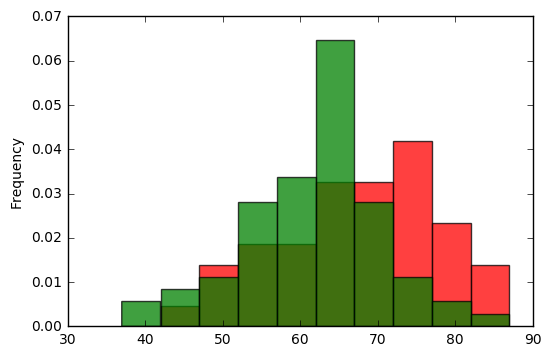

In [10]:
bins = np.linspace(train_gut.Age.min(),train_gut.Age.max(),11)
ax = train_gut[train_gut['Group']==1.0].Age.plot.hist(bins, alpha=0.75, label='CRC', color='red', normed=True)
ax2 = train_gut[train_gut['Group']==0.0].Age.plot.hist(bins,alpha=0.75, label='Control', color='green', normed=True)

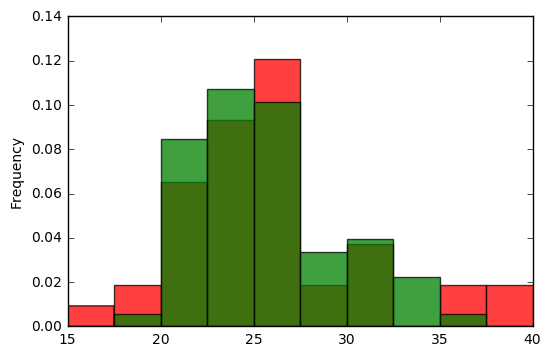

In [13]:
bins = np.linspace(train_gut.BMI.min(),train_gut.BMI.max(),11)
ax = train_gut[train_gut['Group']==1.0].BMI.plot.hist(bins, alpha=0.75, label='CRC', color='red', normed=True)
ax2 = train_gut[train_gut['Group']==0.0].BMI.plot.hist(bins,alpha=0.75, label='Control', color='green', normed=True)

In [14]:
### Use cross validation strategy, small size of the data
### Test data locked in a vault
from sklearn import cross_validation, linear_model

X = train_gut[['SP1','SP2','SP3','SP4','SP5','SP6','SP7','SP8','SP9','SP10','SP11','SP12','SP13','SP14','SP15','SP16','SP17','SP18','SP19','SP20','SP21','SP22','SP23','SP24','SP25','SP26','SP27']].values
y = train_gut['Group'].values

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
X

array([[  0.00000000e+00,   0.00000000e+00,   8.11000000e-06, ...,
          4.46994900e-03,   4.81000000e-05,   5.74893300e-03],
       [  0.00000000e+00,   0.00000000e+00,   1.68000000e-05, ...,
          1.37683000e-04,   7.05003000e-03,   3.91914560e-02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          4.44523600e-03,   5.86532600e-03,   6.16055000e-04],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.75464000e-04,   1.07815400e-03,   2.06099300e-03],
       [  4.54000000e-05,   6.12000000e-05,   1.59000000e-05, ...,
          9.37964000e-04,   0.00000000e+00,   1.28744850e-02],
       [  0.00000000e+00,   0.00000000e+00,   3.48000000e-05, ...,
          2.15162800e-03,   1.12671510e-02,   1.17237300e-03]])

In [12]:
cv = cross_validation.ShuffleSplit(len(y), n_iter=5,test_size=0.3)
## Set up the cross validation

NameError: name 'cross_validation' is not defined

In [180]:
logistic = linear_model.LogisticRegression()
scores_logistic = cross_validation.cross_val_score(logistic,X, y, cv=cv)

In [189]:
scores_logistic.mean(), scores_logistic.std()
#0.59, 0.11#

(0.59999999999999998, 0.10536622236906157)

In [192]:
## Now we try to use only SP1-SP10 to do the logistics regression
X2 = train_gut[['SP1','SP2','SP3','SP4','SP5','SP6','SP7','SP8','SP9','SP10']].values
y = train_gut['Group'].values

In [241]:
cv = cross_validation.ShuffleSplit(len(y), n_iter=5,test_size=0.3)
logistic = linear_model.LogisticRegression()
scores_logistic = cross_validation.cross_val_score(logistic,X2, y, cv=cv)
scores_logistic.mean(), scores_logistic.std()
#0.69, 0.06#
####Only use SP1 to SP10 as features.
####The most successful so far
####X2 seems to be the best combination of informative features

(0.62857142857142856, 0.036140316116210061)

In [244]:
## Now we try to build in meta data columns as features to do the logistics regression
## In this run, X3, I included BMI and FOBT, FOBT is a standardized stool blood test for CRC
X3 = train_gut[['BMI','SP1','SP2','SP3','SP4','SP5','SP6','SP7','SP8','SP9','SP10']]
y = train_gut['Group'].values
###!!!X3 not working
###Imputated BMI missing data with means

In [280]:
logistic = linear_model.LogisticRegression()
scores_logistic = cross_validation.cross_val_score(logistic,X3, y, cv=cv)
scores_logistic.mean(), scores_logistic.std()
#0.64 0.04#
#### X3 is not working ###

(0.6399999999999999, 0.038756171332144401)

In [311]:
## Now we try Linear SVC on X2, with the Cross Validation
## Linear SVC is no better than Logistics Regression
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

C=1.0
linSVC = svm.LinearSVC(C=C).fit(X2, y)


scores_linSVC = cross_validation.cross_val_score(linSVC,X2, y, cv=cv)
scores_linSVC.mean(), scores_linSVC.std()

#0.67, 0.08#

(0.66857142857142859, 0.077932466839919196)

In [330]:
## Try Nearest Neighbors with X2 ##
## Nearest neighbors classifier -> KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
Neigh = neigh.fit(X2, y) 

scores_Neigh = cross_validation.cross_val_score(Neigh,X2, y, cv=cv)
scores_Neigh.mean(), scores_Neigh.std()

#0.69, 0.08#

(0.69714285714285718, 0.075808566636694871)

In [3]:
## Try random forest with X2 ##
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
RF = rf.fit(X2, y)

scores_RF = cross_validation.cross_val_score(RF,X2, y, cv=cv)
scores_RF.mean(), scores_RF.std()

## Definately use RANDOM FOREST ##
#0.80, 0.04#
#pickle  cPickle

NameError: name 'X2' is not defined

In [2]:
scores_RF

NameError: name 'scores_RF' is not defined

Automatically created module for IPython interactive environment


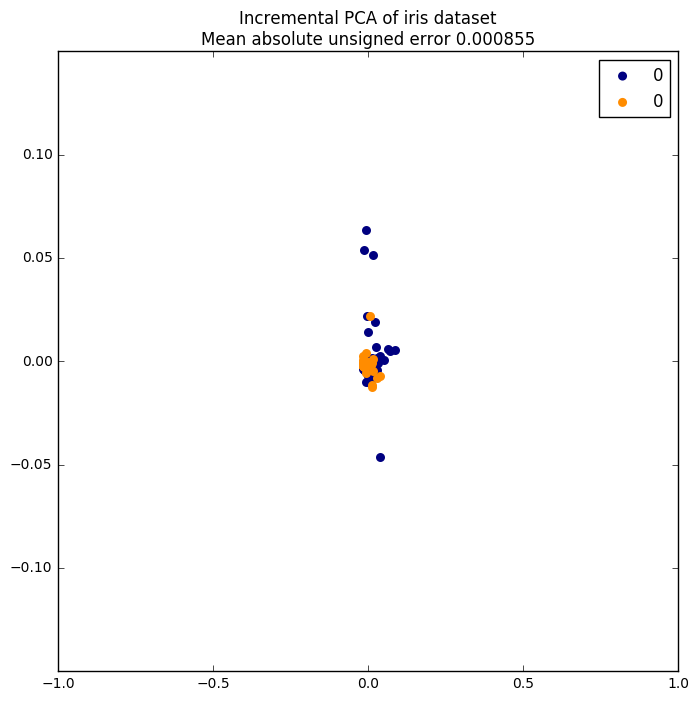

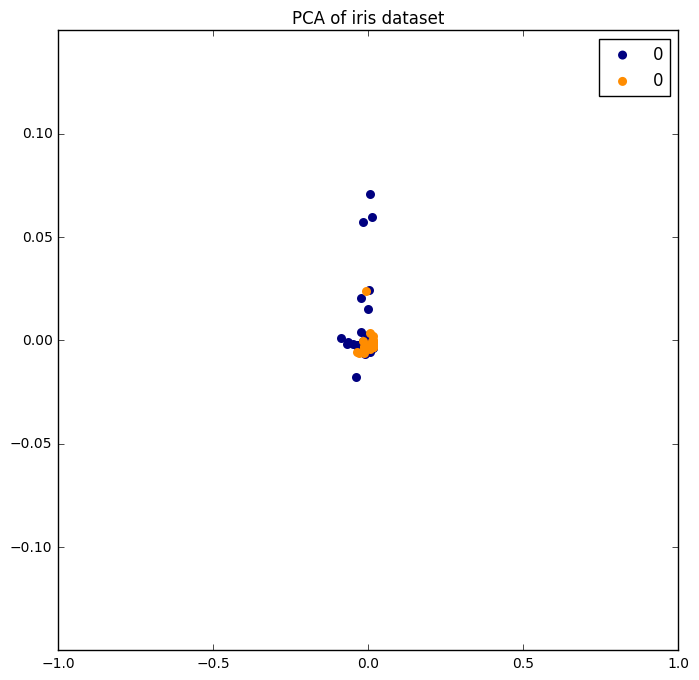

In [390]:
## Use PCA to plot my data ##
## incremental PCA

### The color differentiation for 0 and 1 did not really work
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X2)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X2)

colors = ['navy', 'darkorange']

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1], y):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-1, 1, -0.15, 0.15])

plt.show()